In [2]:
# import statements
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import utilities

sns.set()

train_values = pd.read_csv('./data/train_values.csv') 
train_labels = pd.read_csv('./data/train_labels.csv') 

train_df = train_values.merge(train_labels, on='row_id', how='inner')

# drop row_id
train_df = train_df.drop(columns=['row_id'])
train_df.head(5)

,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,...,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted
0,3,1,1,1,70.0,3,18,37,246,2,...,24.0,6203.0,44.230,60588.0,50.933,716.0,2642.0,4536,False,1
1,1,1,3,1,178.0,3,369,52,299,1,...,57.0,5774.0,15.905,54821.0,100.000,1622.0,2108.0,2458,False,0
2,2,1,3,1,163.0,3,16,10,306,2,...,67.0,6094.0,61.270,67719.0,100.000,760.0,1048.0,5710,False,1
3,1,1,1,1,155.0,1,305,47,180,2,...,105.0,6667.0,6.246,78439.0,100.000,2025.0,2299.0,5888,True,1
4,1,1,1,1,305.0,3,24,37,20,2,...,71.0,6732.0,100.000,63075.0,82.200,1464.0,1847.0,289,False,1


In [3]:
train_df.dtypes


loan_type                           int64
property_type                       int64
loan_purpose                        int64
occupancy                           int64
loan_amount                       float64
preapproval                         int64
msa_md                              int64
state_code                          int64
county_code                         int64
applicant_ethnicity                 int64
applicant_race                      int64
applicant_sex                       int64
applicant_income                  float64
population                        float64
minority_population_pct           float64
ffiecmedian_family_income         float64
tract_to_msa_md_income_pct        float64
number_of_owner-occupied_units    float64
number_of_1_to_4_family_units     float64
lender                              int64
co_applicant                         bool
accepted                            int64
dtype: object

In [4]:
train_df.describe()
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500000 entries, 0 to 499999
Data columns (total 22 columns):
loan_type                         500000 non-null int64
property_type                     500000 non-null int64
loan_purpose                      500000 non-null int64
occupancy                         500000 non-null int64
loan_amount                       500000 non-null float64
preapproval                       500000 non-null int64
msa_md                            500000 non-null int64
state_code                        500000 non-null int64
county_code                       500000 non-null int64
applicant_ethnicity               500000 non-null int64
applicant_race                    500000 non-null int64
applicant_sex                     500000 non-null int64
applicant_income                  460052 non-null float64
population                        477535 non-null float64
minority_population_pct           477534 non-null float64
ffiecmedian_family_income         477560 

In [5]:
# start off simple - drop the NAs
#df = train_df.dropna() 
df = train_df 
# set the co_applicant to int for histograms
df['co_applicant'] = df['co_applicant'].astype(int)


# get more sophisitcated later
#utilities.remove_cols_with_perc_missing_values(train_df, .1)
print('done!')

columns with less than  0.1  non-null values: 
done!


In [6]:
# make some additional categorical columns for some quick Eexploratory data analysis

# loan_type
loan_type_dict = {'1':'Conventional', '2':'FHA-Insured', '3':'VA-guarenteed', '4':'FSA/RHS'}
utilities.factor_int_column_with_keys(df, 'loan_type', loan_type_dict)

# property type
property_type_dict = {'1':'1 to 4 Family - non manufactured', 
                      '2':'Manufactured Housing',
                      '3':'Multifamily'}
utilities.factor_int_column_with_keys(df, 'property_type', property_type_dict)

# loan purpose
loan_purpose_dict = {'1':'Home purchase',
                      '2':'Home improvement',
                      '3':'Refinancing'}
utilities.factor_int_column_with_keys(df, 'loan_purpose', loan_purpose_dict)

# occupancy
occupancy_dict = {'1':'Owner Occupied',
                  '2':'Not owner-occupied',
                  '3': None}
utilities.factor_int_column_with_keys(df, 'occupancy', occupancy_dict)

# preapproval
preapproval_dict = {'1':'Requested',
                    '2':'Not Requested',
                    '3':None}
utilities.factor_int_column_with_keys(df, 'preapproval', preapproval_dict)

# applicant_ethnicity 
app_ethnicity_dict = {'1':'Hispanic',
                  '2':'Not Hispanic',
                  '3':None,
                  '4':None,
                  '5':None}
utilities.factor_int_column_with_keys(df, 'applicant_ethnicity', app_ethnicity_dict)

# applicant_race 
app_race_dict = {'1':'American Indian',
                '2':'Asian',
                 '3':'African American',
                 '4':'Pacific Islander',
                 '5':'White',
                 '6':None,
                 '7':None,
                 '8':None}
utilities.factor_int_column_with_keys(df, 'applicant_race', app_race_dict)

# applicant_sex 
app_gender_dict = {'1':'Male',
                   '2':'Female',
                   '3':None,
                   '4':None}
utilities.factor_int_column_with_keys(df, 'applicant_sex', app_gender_dict)

# look for -1 and replace with None appropriately
# msa_md, 
msa_md_dict = {'-1':None}
utilities.factor_int_column_with_keys(df, 'msa_md', msa_md_dict)

#state_code, 
state_code_dict = {'-1':None}
utilities.factor_int_column_with_keys(df, 'state_code', state_code_dict)

#country_code
county_code_dict = {'-1':None}
utilities.factor_int_column_with_keys(df, 'county_code', county_code_dict)


df.head(5)

,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,...,property_type_str,loan_purpose_str,occupancy_str,preapproval_str,applicant_ethnicity_str,applicant_race_str,applicant_sex_str,msa_md_str,state_code_str,county_code_str
0,3,1,1,1,70.0,3,18,37,246,2,...,1 to 4 Family - non manufactured,Home purchase,Owner Occupied,None,Not Hispanic,White,Male,18,37,246
1,1,1,3,1,178.0,3,369,52,299,1,...,1 to 4 Family - non manufactured,Refinancing,Owner Occupied,None,Hispanic,White,Male,369,52,299
2,2,1,3,1,163.0,3,16,10,306,2,...,1 to 4 Family - non manufactured,Refinancing,Owner Occupied,None,Not Hispanic,White,Male,16,10,306
3,1,1,1,1,155.0,1,305,47,180,2,...,1 to 4 Family - non manufactured,Home purchase,Owner Occupied,Requested,Not Hispanic,White,Male,305,47,180
4,1,1,1,1,305.0,3,24,37,20,2,...,1 to 4 Family - non manufactured,Home purchase,Owner Occupied,None,Not Hispanic,African American,Female,24,37,20


In [7]:
# subset categoricals for easy visualization
categorical_cols = [ 'loan_type_str', 'property_type_str', 'loan_purpose_str', 'occupancy_str', 'preapproval_str', 'applicant_ethnicity_str',
                     'applicant_race_str', 'applicant_sex_str', 'msa_md_str', 'state_code_str', 'county_code_str' ]
categorical_df = df[ categorical_cols ]
categorical_df['accepted'] = df['accepted']

categorical_df.head(5)


C:\Users\BenMcC\AppData\Local\conda\conda\envs\mortgage-classifier-capstone\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,loan_type_str,property_type_str,loan_purpose_str,occupancy_str,preapproval_str,applicant_ethnicity_str,applicant_race_str,applicant_sex_str,msa_md_str,state_code_str,county_code_str,accepted
0,VA-guarenteed,1 to 4 Family - non manufactured,Home purchase,Owner Occupied,None,Not Hispanic,White,Male,18,37,246,1
1,Conventional,1 to 4 Family - non manufactured,Refinancing,Owner Occupied,None,Hispanic,White,Male,369,52,299,0
2,FHA-Insured,1 to 4 Family - non manufactured,Refinancing,Owner Occupied,None,Not Hispanic,White,Male,16,10,306,1
3,Conventional,1 to 4 Family - non manufactured,Home purchase,Owner Occupied,Requested,Not Hispanic,White,Male,305,47,180,1
4,Conventional,1 to 4 Family - non manufactured,Home purchase,Owner Occupied,None,Not Hispanic,African American,Female,24,37,20,1


In [8]:
# df , label_key, max_fields=10
# see if there's any significant difference ( +- 5% of 50% ) per category

        
'''
for col in df.columns:
    df = pd.crosstab( df[col], df[label_key], normalize='index')
    #if (len(df) < max_fields):
    print(df)
    print('--------------------')
'''
                  
# see if there's any significant difference ( +- 5% of 50% ) per category

#print('--------------------')
            
#utilities.category_compare_to_classification_label(categorical_df, 'accepted', 10)

"\nfor col in df.columns:\n    df = pd.crosstab( df[col], df[label_key], normalize='index')\n    #if (len(df) < max_fields):\n    print(df)\n    print('--------------------')\n"

In [9]:
# pd.crosstab(df['loan_type_str'],df['accepted'], normalize='index')

In [10]:
def compare_category_to_label(df, column_key, label_key, threshold_value ):
    
    # start off with a cross tab - start per group
    df1 = pd.crosstab( df[column_key], df[label_key] )
    total_observations = df1[0].sum() + df1[1].sum()
   
    # feature engineer some totals and the absolute diff
    df1['perc_0_group'] = df1[0] / ( df1[0] + df1[1] )
    df1['perc_1_group'] = df1[1] / ( df1[0] + df1[1] )
    df1['perc_0_total'] = df1[0] / total_observations
    df1['perc_1_total'] = df1[1] / total_observations
    df1['label_diff_total'] = abs( df1['perc_0_total'] - df1['perc_1_total'] )
    
    count = 0 
    group_labels = list(df1.index)
    for index, row in df1.iterrows():
        # access data using column names
        if row[ 'label_diff_total' ] >= threshold_value:
            print( column_key , ' - ' , group_labels[ count ] ,  ' =  ' , row[ 'label_diff_total' ]  ) 
     #print(index, row['delay'], row['distance'], row['origin'])
            count += 1
        
        
    return df1

for cat in categorical_cols:
    df1 = compare_category_to_label(df, cat, 'accepted', .02 )



property_type_str  -  1 to 4 Family - non manufactured  =   0.020594
property_type_str  -  Manufactured Housing  =   0.021646
loan_purpose_str  -  Home improvement  =   0.032842
loan_purpose_str  -  Home purchase  =   0.079034
loan_purpose_str  -  Refinancing  =   0.045736
preapproval_str  -  Not Requested  =   0.21137122993328908
preapproval_str  -  Requested  =   0.13166687291176837
applicant_ethnicity_str  -  Hispanic  =   0.03626371362584491
applicant_race_str  -  African American  =   0.03254845095060535
applicant_race_str  -  American Indian  =   0.053118814160106775
applicant_sex_str  -  Female  =   0.020899010643539523
applicant_sex_str  -  Male  =   0.028673460044213672


In [11]:
 # property_type_str  , loan_purpose_str  , preapproval_str  , applicant_race_str  , applicant_sex_str  

In [12]:
#df1 = compare_category_to_label(df, 'loan_type_str', 'accepted')
#df1.head(5)
#df1.columns.names

# df = pd.crosstab(df['loan_type_str'],df['accepted'], normalize='index')

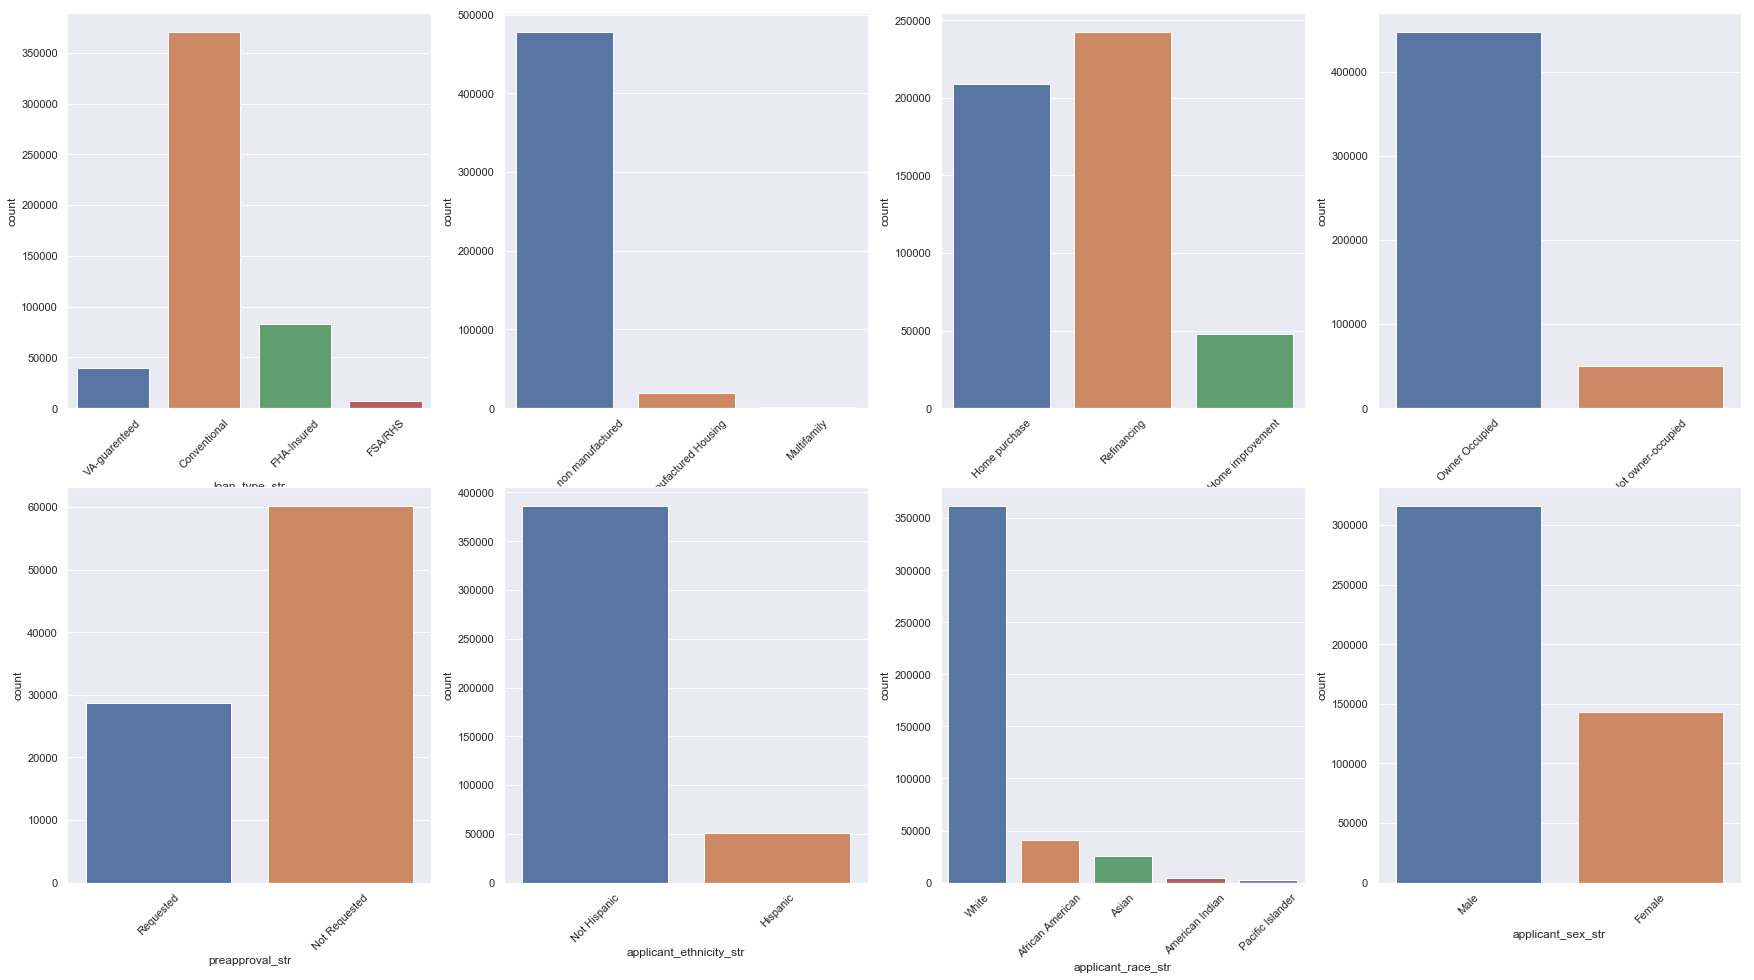

In [13]:
# set default style
sns.set()

# plot distribution in grid
fig, ax = plt.subplots(2, 4, figsize=(30, 16))
for variable, subplot in zip(categorical_df, ax.flatten()):
    sns.countplot(df[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(45)

In [14]:
# normalize! Columns to consider
numeric_cols =[ 'loan_amount', 'applicant_income', 'population', 'ffiecmedian_family_income',
               'number_of_owner-occupied_units', 'number_of_1_to_4_family_units']

# convert tp percentages
df['minority_population_pct'] = df['minority_population_pct']/100.0
df['tract_to_msa_md_income_pct'] = df['tract_to_msa_md_income_pct']/100.0

numeric_df = df[numeric_cols]
numeric_df['label'] = pd.Series( df['accepted'] )
numeric_df.head(5)

C:\Users\BenMcC\AppData\Local\conda\conda\envs\mortgage-classifier-capstone\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,loan_amount,applicant_income,population,ffiecmedian_family_income,number_of_owner-occupied_units,number_of_1_to_4_family_units,label
0,70.0,24.0,6203.0,60588.0,716.0,2642.0,1
1,178.0,57.0,5774.0,54821.0,1622.0,2108.0,0
2,163.0,67.0,6094.0,67719.0,760.0,1048.0,1
3,155.0,105.0,6667.0,78439.0,2025.0,2299.0,1
4,305.0,71.0,6732.0,63075.0,1464.0,1847.0,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AC8C2F8908>,
      dtype=object)

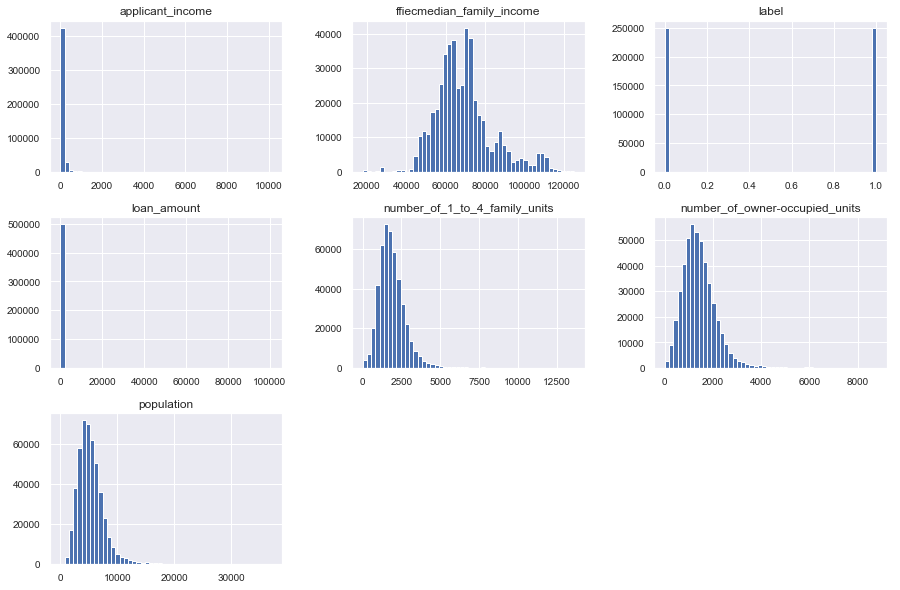

In [15]:
# look at the distributions
num_bins = 50 #int(math.sqrt(len(df)))
numeric_df.hist(figsize=(15,10), bins=num_bins, xlabelsize=10, ylabelsize=10)

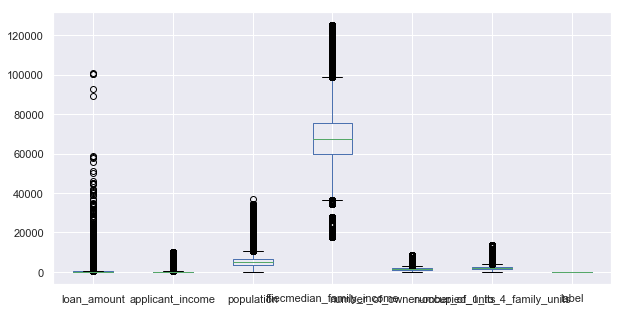

In [16]:
# look at the distributions
numeric_df.boxplot(figsize=(10,5)) # xlabelsize=10, ylabelsize=10)

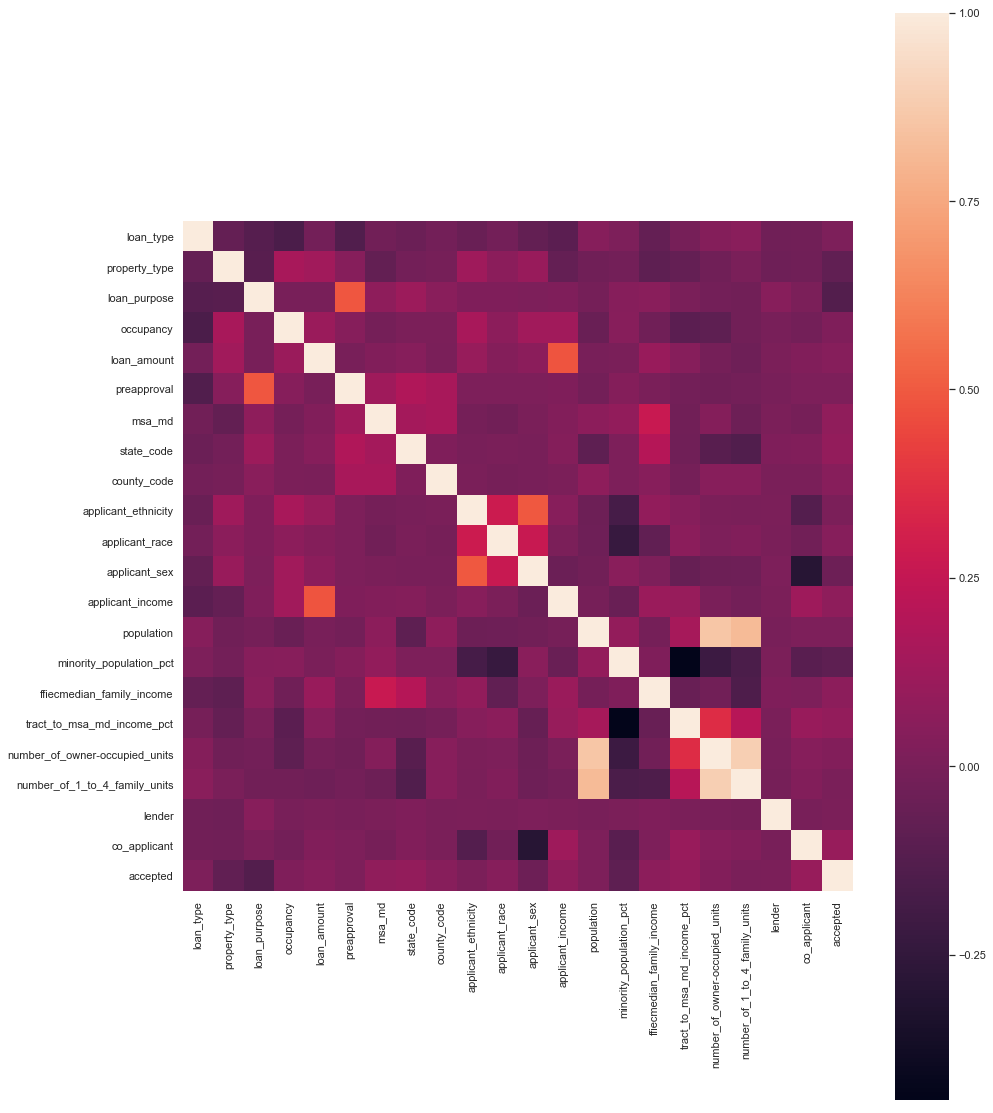

In [20]:


numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
all_numeric_df = df.select_dtypes(include=numerics)

corrmatt = all_numeric_df.corr()


f, ax = plt.subplots(figsize=(15,20))
sns.heatmap(corrmatt, square=True)


In [29]:
accepted_sorted = corrmatt.sort_values(by=['accepted'])
accepted_col = accepted_sorted['accepted']
print("bottom: ",accepted_col[:10])
print()
print("top: ",accepted_col[-10:] )

bottom:  loan_purpose                    -0.131595
minority_population_pct         -0.092922
property_type                   -0.080603
applicant_sex                   -0.038391
number_of_1_to_4_family_units    0.006027
lender                           0.008494
applicant_ethnicity              0.009777
preapproval                      0.017209
loan_type                        0.018589
population                       0.019163
Name: accepted, dtype: float64

top:  applicant_race                0.045361
loan_amount                   0.046370
county_code                   0.052613
ffiecmedian_family_income     0.066919
applicant_income              0.074722
msa_md                        0.080288
state_code                    0.090534
tract_to_msa_md_income_pct    0.091766
co_applicant                  0.101116
accepted                      1.000000
Name: accepted, dtype: float64
